In [1]:

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt



In [7]:
 #Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 80
learning_rate = 0.001

# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)


In [8]:
model = nn.Linear(input_size, output_size)


In [9]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  



In [10]:
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))


Epoch [5/80], Loss: 44.4264
Epoch [10/80], Loss: 18.2431
Epoch [15/80], Loss: 7.6354
Epoch [20/80], Loss: 3.3377
Epoch [25/80], Loss: 1.5963
Epoch [30/80], Loss: 0.8905
Epoch [35/80], Loss: 0.6041
Epoch [40/80], Loss: 0.4878
Epoch [45/80], Loss: 0.4403
Epoch [50/80], Loss: 0.4207
Epoch [55/80], Loss: 0.4123
Epoch [60/80], Loss: 0.4086
Epoch [65/80], Loss: 0.4067
Epoch [70/80], Loss: 0.4056
Epoch [75/80], Loss: 0.4048
Epoch [80/80], Loss: 0.4041


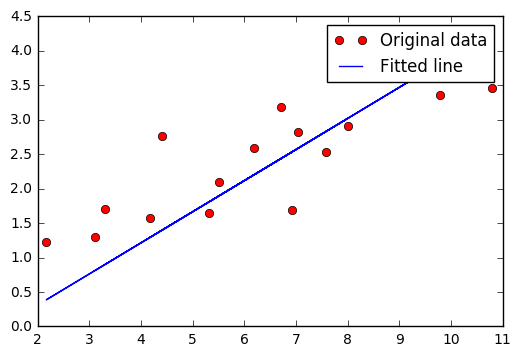

In [11]:
# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()
